<a href="https://colab.research.google.com/github/Ophineon/Winter2022MicroCred/blob/main/IrisKNNClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
#model training import
from sklearn.preprocessing import StandardScaler
#scaling import
from sklearn.neighbors import KNeighborsClassifier
#classifiers import
from sklearn.metrics import classification_report, confusion_matrix
#evaluation imports
import seaborn as sns

#Load

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

#View

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()
#only categorical column to test for

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#Clean

In [7]:
df2 = df.drop(columns= 'Id',inplace= False)
#dropping Id number because it does not provide information relating to the correlation between the other variables and plant species

In [8]:
df2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#KNN Implementation

In [10]:
#Here we define our X and y variables
X = df2.iloc[:,:-1]
#from the new dataframe we use iloc to take columns based on indices
#using : in the square brackets tells pandas to take all the values of all the rows in the dataframe
#the comma lets us index the columns
#in the case of the columns, we use :-1 to take all the columns except the last one, the species column
y = df2.iloc[:,4]
#again we use : to get all rows then comma to indicate columns
#this time we use 4 to get the last column of the dataset

In [11]:
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size =.30)
#We use our previously defined X and y variables and setting a reasonable test size
#we train 70% and test 30% of the data 
#The training data set has 105 objects and the test set has 45

In [12]:
#Now we will normalize the data through scaling
scaler = StandardScaler()
#initializing an instance of the scaler
scaler.fit(X_train)
#fit method is applied on data to find "line of best fit", basically it finds the mean and standard deviation 
X_train = scaler.transform(X_train)
#the transform method subtracts mean from all values and then divide it by std to scale the data
X_test = scaler.transform(X_test)
#Scaling should be applied to both test and train
#It should be done after the split to avoid data leakage

In [13]:
classifier = KNeighborsClassifier(n_neighbors=5)
#initializing the Kneighbors class and setting the "K", the number of neighbors near our data points
#the proximity of the the points near the point being looked at determine what class the point belongs to
classifier.fit(X_train,y_train)
#find neighbors using the training data using X and y variables

KNeighborsClassifier()

In [14]:
# now we make predictions
y_pred = classifier.predict(X_test)
#after the algorithim trains with a large part of the data to find patterns 
# give it the testing data and see how it reacts and if it can accurately discern patterns in the new introduced data 


#Evaluating the Model

In [15]:
# Now we evaluate the accuracy of the model
print(classification_report(y_test, y_pred))
#these are both methods of evaluating the accuracy of the model 
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        27
Iris-versicolor       0.88      0.92      0.90        39
 Iris-virginica       0.92      0.87      0.89        39

       accuracy                           0.92       105
      macro avg       0.93      0.93      0.93       105
   weighted avg       0.92      0.92      0.92       105

[[27  0  0]
 [ 0 36  3]
 [ 0  5 34]]


In [16]:
#Y axis is True Values
#X axis is predicted
#Diagonals are number of correctly predicted

In [17]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

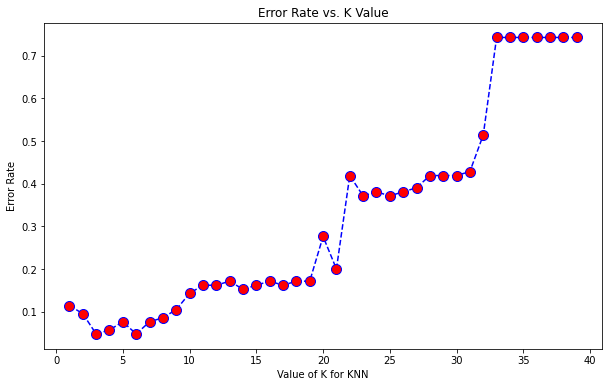

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K for KNN')  
plt.ylabel('Error Rate')

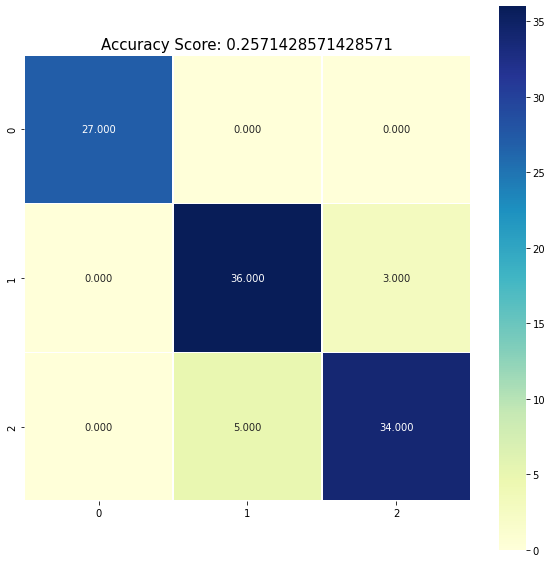

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);